### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

A1. The wine quality dataset typically includes features such as:

1. **Fixed Acidity**: Measures the non-volatile acids that do not evaporate. Important for the wine's taste profile.
2. **Volatile Acidity**: Measures the amount of acetic acid in wine, which can lead to an unpleasant vinegar taste if too high.
3. **Citric Acid**: Adds freshness and flavor to wines. Small quantities can enhance the wine's flavor.
4. **Residual Sugar**: The amount of sugar remaining after fermentation stops. It affects the sweetness of the wine.
5. **Chlorides**: The amount of salt in the wine. Can influence the wine's overall taste.
6. **Free Sulfur Dioxide**: Prevents microbial growth and oxidation.
7. **Total Sulfur Dioxide**: The total amount of SO2, both free and bound. High levels can affect the taste and aroma.
8. **Density**: The density of wine is related to the alcohol and sugar content.
9. **pH**: Describes the acidity of the wine. Low pH means high acidity.
10. **Sulphates**: Added to wine to enhance its preservation.
11. **Alcohol**: The percentage of alcohol in wine. Generally, higher alcohol content is associated with higher quality.
12. **Quality**: The target variable, which is the wine's quality score.

Each feature contributes to the overall sensory experience of the wine, such as taste, aroma, and mouthfeel. Understanding these features helps in predicting the wine quality, as they directly impact consumer preferences and satisfaction.

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

A2. Handling Missing Data in the wine quality data set during the feature engineering process:
1. **Remove Rows with Missing Values**:
   - **Advantages**: Simple and quick.
   - **Disadvantages**: Can lead to significant data loss if many rows have missing values.

2. **Mean/Median/Mode Imputation**:
   - **Advantages**: Easy to implement and fast.
   - **Disadvantages**: Can distort data distribution and reduce variability.

3. **Imputation Using k-NN**:
   - **Advantages**: Takes into account the similarity between instances, potentially leading to more accurate imputations.
   - **Disadvantages**: Computationally expensive, especially with large datasets.

4. **Predictive Modeling Imputation**:
   - **Advantages**: Uses machine learning models to predict missing values, which can be more accurate.
   - **Disadvantages**: Complex to implement and can be time-consuming.

### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

A3. These are the "Key Factors" :
1. **Study Time**: The amount of time spent studying.
2. **Attendance**: Regular attendance in classes.
3. **Previous Grades**: Historical academic performance.
4. **Parental Involvement**: Support from family.
5. **Socioeconomic Status**: Financial background.
6. **Mental Health**: Stress levels and overall mental health.
7. **Physical Health**: General physical well-being.

**Analyzing these Factors**:
1. **Descriptive Statistics**: Summarize the data to understand the central tendency, variability, and distribution.
2. **Correlation Analysis**: Measure the strength and direction of relationships between variables.
3. **Regression Analysis**: Use linear or logistic regression to model the relationship between independent variables (e.g., study time) and the dependent variable (exam performance).
4. **ANOVA**: Analyze the differences between groups (e.g., impact of different teaching methods).
5. **Factor Analysis**: Identify underlying relationships between variables.

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

A4. The Feature Engineering Process :
1. **Data Cleaning**: Handle missing values, correct errors, and remove outliers.
2. **Feature Selection**: Identify important variables through correlation analysis, mutual information, or feature importance from models like Random Forest.
3. **Transformation**:
   - **Normalization/Standardization**: Scale numerical features to have a mean of 0 and standard deviation of 1.
   - **One-Hot Encoding**: Convert categorical variables into binary columns.
   - **Polynomial Features**: Create interaction terms to capture non-linear relationships.
4. **Feature Creation**: Combine existing features to create new meaningful features (e.g., total study hours = study hours at school + study hours at home).

### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

A5. Exploratory Data Analysis (EDA)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

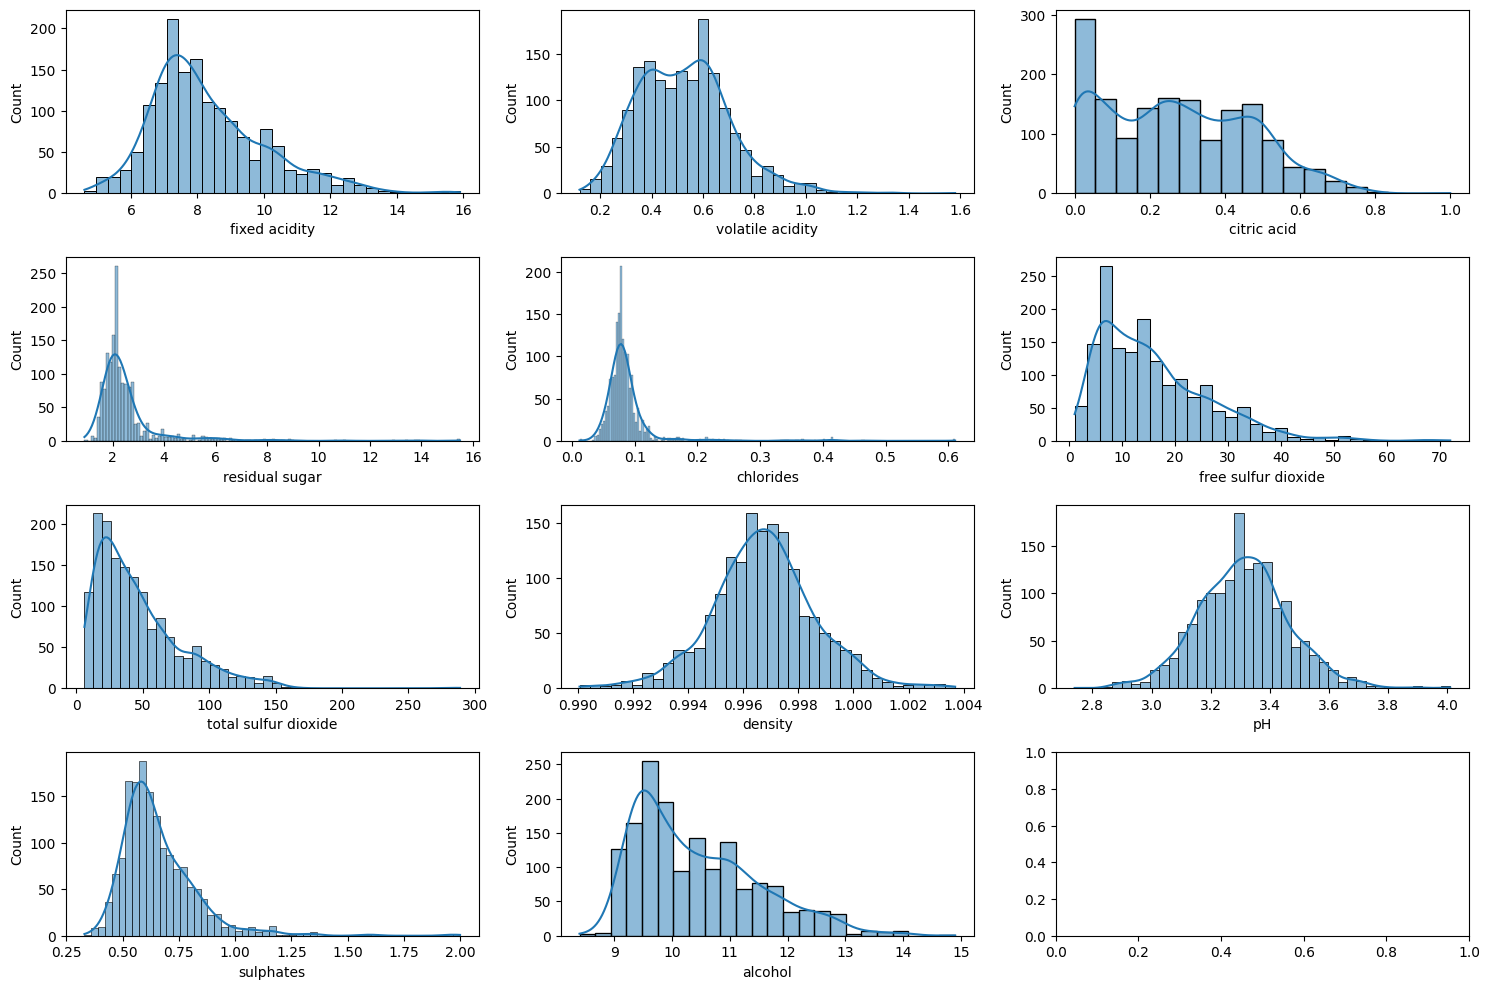

fixed acidity           0.981829
volatile acidity        0.670962
citric acid             0.318039
residual sugar          4.536395
chlorides               5.675017
free sulfur dioxide     1.249394
total sulfur dioxide    1.514109
density                 0.071221
pH                      0.193502
sulphates               2.426393
alcohol                 0.860021
quality                 0.217597
dtype: float64


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the dataset
wine_data = pd.read_csv('winequality-red.csv')

# EDA
print(wine_data.describe())

# Plot distributions
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axs = axs.flatten()
for i, col in enumerate(wine_data.columns[:-1]):
    sns.histplot(wine_data[col], ax=axs[i], kde=True)
plt.tight_layout()
plt.show()

# Check skewness
skewness = wine_data.apply(lambda x: skew(x.dropna()))
print(skewness)

**Non-Normality and Transformations**:
- **Features with high skewness (e.g., Volatile Acidity, Chlorides)**: Apply log transformation or Box-Cox transformation to reduce skewness and improve normality.

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?


In [3]:
#A6.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = wine_data.drop('quality', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=0.90)  # retain 90% variance
pca_fit = pca.fit(scaled_features)

# Number of components to explain 90% variance
n_components = pca_fit.n_components_
print(n_components)

7


**Interpretation**: The output will indicate the minimum number of principal components required to retain 90% of the variance in the data, thereby reducing dimensionality while preserving most of the information.